<div style="text-align: left">
    <img src="./img/title_img.png" alt="Box Office Insights: Microsoft Studios" title="Box Office Insights: Microsoft Studios"/>
</div>


# Box Office Alchemy: Unveiling Blockbuster Formulas for Microsoft Studios

**Author:** *Wayne Kipngeno Korir*

### Business Case Summary: Microsoft Movie Studio

#### Project Overview:
The project aims to use exploratory data analysis to generate insights for Microsoft's new movie studio. The goal is to identify the types of films that are currently performing well at the box office, allowing Microsoft to make informed decisions regarding the content they should create.

#### Business Problem:
Microsoft has observed the success of other major companies in the entertainment industry that produce original video content. As a result, they have decided to enter the movie industry by establishing their own movie studio. However, lacking experience in the film industry, Microsoft needs to understand which types of films are currently achieving the highest success at the box office. This project will focus on analyzing data to provide actionable insights to the head of Microsoft's movie studio, assisting them in making strategic decisions on film creation.

#### Questions to Consider:

1. **Genre Popularity Analysis:**
   - What are the most popular genres at the domestic and international box office?
   - How does the popularity of genres vary over time and across different regions (domestic and foreign)?

2. **Budget Impact on Box Office Performance:**
   - How does the budget of a movie relate to its box office performance?
   - Is there a correlation between the budget range and the box office success of different genres?

3. **Effect of Runtime and Genre on Box Office Performance:**
   - How does the runtime of a movie influence its box office performance, and does this effect vary across genres?
   - Are there certain genres that tend to perform better with longer or shorter runtimes?

4. **Rating and Box Office Performance:**
   - Is there a relationship between the movie's rating (e.g., PG, PG-13, R) and its box office success?
   - Do certain genres consistently receive higher ratings, and does this contribute to their box office performance?
   
5. **Return on Investment (ROI) for Genres and Budget Ranges:**
    - What is the average ROI for movies of different genres and budget categories?



In [1]:
# import requisite libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# allow inline plotting
%matplotlib inline

In [2]:
# checking all the available datasets provided in the project folder
import os
file_list = os.listdir(r"C:/Users/user/Documents/Flatiron/dsc-movie-studio-project/data")
for file_name in file_list:
    print(file_name)

bom.movie_gross.csv
cleaned_movies.csv
imdb.name.basics.csv
imdb.title.akas.csv
imdb.title.basics.csv
imdb.title.crew.csv
imdb.title.principals.csv
imdb.title.ratings.csv
rt.movie_info.tsv
rt.reviews.tsv
tmdb.movies.csv
tn.movie_budgets.csv


### Dataset Inspection
In order to select relevant datasets and ultimately relevant features, we will inspect all the availble datasets. Specifically, we will look at the features contained in each dataset to determine whether they will be relevant to the project.

In [3]:
tn_movie_budget_df = pd.read_csv("./data/tn.movie_budgets.csv", index_col="id", header=0)
tmdb_movies_df = pd.read_csv("./data/tmdb.movies.csv", header=0)
reviews_df = pd.read_csv("./data/rt.reviews.tsv", index_col="id", header=0, delimiter="\t", encoding="latin1")
movie_info_df = pd.read_csv("./data/rt.movie_info.tsv", header=0, index_col="id", delimiter="\t")
titles_ratings_df = pd.read_csv("./data/imdb.title.ratings.csv", header=0)
titles_principals_df = pd.read_csv("./data/imdb.title.principals.csv", header=0)
titles_crew_df = pd.read_csv("./data/imdb.title.crew.csv", header=0)
bom_df = pd.read_csv("./data/bom.movie_gross.csv", header=0)
titles_aka_df = pd.read_csv("./data/imdb.title.akas.csv", header=0)
name_basics_df = pd.read_csv("./data/imdb.name.basics.csv", header=0)
titles_basics_df = pd.read_csv("./data/imdb.title.basics.csv", header=0)

In [4]:
# inspecting the bom.movie_gross dataset
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
# inspecting the name basics dataset
name_basics_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [6]:
# inspecting the title akas dataset
titles_aka_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [7]:
# inspecting the title basics dataset
titles_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
# inspecting the imdb.title.crew dataset
titles_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [9]:
# inspecting the imdb.title.principals dataset
titles_principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [10]:
# inspecting the imdb.title.ratings.csv dataset
titles_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
# inspecting the rt.movie_info.tsv dataset
movie_info_df.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [12]:
# inspecting the rt.reviews.tsv dataset
reviews_df.head()

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [13]:
# inspecting the tmdb.movies.csv dataset
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [14]:
# inspecting the tn.movie_budgets.csv dataset
tn_movie_budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Dataset Selection:

The following datasets were identified to contain features necessary to answer the formulated questions:

1. **Title Basics Dataset:**
   - Relevant features:
     - Primary title
     - Runtime in minutes
     - Genre

2. **Tn.movie_budgets Dataset:**
   - Contains production and box office performance data:
     - Movie name
     - Production budget
     - Domestic gross
     - Worldwide gross
     - Release Date

3. **Tmdb Movies Dataset:**
   - Relevant features:
     - Movie rating/Vote average
     - Numvotes
     - Popularity

4. **Movie Info Dataset:**
   - Relevant features:
     - Director
     - Writer
     - Rating

With these four datasets, we have sufficient information to answer the formulated questions.


In [15]:
### Further Inspection of selected datasets

In [16]:
# checking completeness and datatypes of the titles basics dataset
titles_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [17]:
# checking completeness and datatypes of the tn_movie_budget dataset
tn_movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [18]:
# checking completeness and datatypes of the tmbd dataset
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [19]:
# checking completeness and datatypes of the movie info dataset
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [20]:
titles_crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


### Inspection Notes:

**1. Title Basics Dataset:**
- The dataset contains *146,144* entries. The `runtime_minutes` column is missing some values (has *114,405* non-null entries).

**Data Cleaning**
- To ensure accurate runtime analysis, we will retain entries where the `runtime_minutes` column is not null. For analyses that don't require runtime information, we can still include the entries.
- The `genre` column has compound objects, with some entries containing multiple genres separated by commas.
  - **Assumption:** For this analysis, we will consider the first genre listed in the `genre` column as the main genre, the second as the secondary genre, and the third as the tertiary genre.

**2. tn_movie_budget dataset:**
- The dataset contains *5,782* entries.
- The `budget`, `domestic_gross`, and `worldwide_gross` columns, which are expected to be of floating-point dtype, were found to be of dtype object.
- The `release_date` column has object dtype instead of datetime dtype.

**Data Cleaning**
- To facilitate further analysis, we will extract numerical values from the `budget`, `domestic_gross`, and `worldwide_gross` columns and convert them to float dtype.
- To enable date-based analysis, we will cast the `release_date` column from object type to datetime dtype.

**3. tmdb dataset:**
- The dataset contains *26,517* entries.
- All columns except the `release_date` column have the expected dtypes.

**Data Cleaning**
- To facilitate date-based analysis, we will cast the `release_date` column from object type to datetime dtype.

**4. movie_info dataset:**
- The dataset contains ~1,557 entries. Unfortunately, the dataset contains too few entries to be useful for our analysis. However, the `titles_crew` dataset has the director and writer information that was originally contained in the `movie_info` dataset.

**Data Cleaning**
- The `directors` and `writers` columns have compound entries, with some entries containing multiple strings separated by commas, indicating that a movie was directed or written by more than one individual.
  - **Assumption:** For this analysis, we will assume that the first director/writer listed in the column is the main director/writer, the second is considered the assistant director/writer, and the third is the supporting director/writer.

### Data Preparation: Cleaning & Wrangling

In summary, the inspection notes detail the key observations and data cleaning steps necessary to prepare the datasets for analysis. By addressing missing values, casting datatypes, and handling compound entries, we can ensure the data is accurate and suitable for further exploration and insights generation.


In [21]:
titles_basics_df.set_index('tconst').head(3)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [22]:
titles_crew_df.head(3)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585


In [23]:
def split_compound_entries(dataframe, columns):
    '''
    Splits compound entries in multiple DataFrame columns into separate strings.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the columns to be processed.
        columns (list): A list of column names in the DataFrame to split compound entries.

    Returns:
        pd.DataFrame: A new DataFrame with additional columns containing the split strings.
    '''
    # Ensure all input columns exist in the DataFrame
    for column in columns:
        if column not in dataframe.columns:
            raise ValueError(f"Column '{column}' not found in the DataFrame.")
    
    # Initialize an empty dictionary to hold new split columns
    new_columns = {}
    
    # Process each input column
    for column in columns:
        # Get the index of the dataframe
        index = dataframe.index

        # Create new column names for the split strings
        col_1, col_2, col_3 = [(f"{column}_{i}") for i in range(1, 4)]
        
        # Initialize lists to hold the new split values
        new_col_1, new_col_2, new_col_3 = [], [], []

        # Iterate over each entry in the specified column
        for entry in dataframe[column]:
            try:
                # Split the entry using a comma as the separator
                items = entry.split(",") 

                # Keep only the first three items if there are more than three
                if len(items) > 3:
                    items = items[:3]
                
                # Assign the split items to the new columns accordingly
                if len(items) == 1:
                    new_col_1.append(items[0])
                    new_col_2.append(None)
                    new_col_3.append(None)
                elif len(items) == 2:
                    new_col_1.append(items[0])
                    new_col_2.append(items[1])
                    new_col_3.append(None)
                elif len(items) == 3:
                    new_col_1.append(items[0])
                    new_col_2.append(items[1])
                    new_col_3.append(items[2])
            except AttributeError:
                # Handle the case when the entry is not a string (e.g., NaN)
                new_col_1.append(None)
                new_col_2.append(None)
                new_col_3.append(None)
        
        # Store the new split values in the dictionary with column name as the key
        new_columns[col_1] = new_col_1
        new_columns[col_2] = new_col_2
        new_columns[col_3] = new_col_3
    
    # Create a new DataFrame from the new_columns dictionary
    df = pd.DataFrame(new_columns)
    
    # Drop the original columns from the DataFrame
    new_df = dataframe.drop(columns=columns)
    
    # Join the new DataFrame with the DataFrame containing the new split columns based on the index
    new_df = new_df.join(df, on=df.index)
    
    return new_df


In [24]:
# Split compound entries in the title_basics DataFrame for the 'genres' column
# and create new DataFrame nw_title_basics_df containing the split columns.
nw_title_basics_df = split_compound_entries(titles_basics_df.set_index('tconst'), ['genres'])

# Split compound entries in the title_crew DataFrame for the 'directors' and 'writers' columns
# and create new DataFrame nw_titles_crew_df containing the split columns.
nw_titles_crew_df = split_compound_entries(titles_crew_df.set_index('tconst'), ['directors', 'writers'])


In [25]:
# We are joining these two DataFrames using the 'tconst' column as the common index
# to create a new combined DataFrame named 'movies_df'.
movies_df = nw_title_basics_df.join(nw_titles_crew_df, on=['tconst'])

# Displaying the first few rows of the combined DataFrame 'movies_df'.
movies_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres_1,genres_2,genres_3,directors_1,directors_2,directors_3,writers_1,writers_2,writers_3
tconst,,,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,Crime,Drama,nm0712540,None,None,nm0023551,nm1194313,nm0347899
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,Drama,None,nm0002411,None,None,None,None,None
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,None,None,nm0000080,None,None,nm0000080,nm0462648,None
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,Comedy,Drama,None,nm0611531,None,None,nm0347899,None,None
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy,Drama,Fantasy,nm0765384,nm0749914,None,nm1360635,nm0749914,None


In [26]:
# inspecting the joined dataframe
movies_df.reset_index(inplace=True)

In [27]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres_1         140736 non-null  object 
 6   genres_2         59378 non-null   object 
 7   genres_3         29436 non-null   object 
 8   directors_1      140417 non-null  object 
 9   directors_2      15727 non-null   object 
 10  directors_3      2501 non-null    object 
 11  writers_1        110261 non-null  object 
 12  writers_2        42229 non-null   object 
 13  writers_3        14383 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 15.6+ MB


In [28]:
# inspecting the name basics dataset
name_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [29]:
def add_name_columns(df, names_df, id_columns, name_prefix):
    """
    Add name columns to the DataFrame for directors and writers based on the provided 'names_df'.

    Parameters:
        df (pd.DataFrame): The main DataFrame to which name columns will be added.
        names_df (pd.DataFrame): The DataFrame containing IDs and names of directors and writers.
        id_columns (list): A list of columns in 'df' containing the IDs of directors and writers.
        name_prefix (str): A prefix to use for the name columns (e.g., 'director_name', 'writer_name').

    Returns:
        pd.DataFrame: A new DataFrame with the added name columns.
    """
    # Iterate through each ID column in 'id_columns'
    for id_column in id_columns:
        # Merge 'df' with 'names_df' to add the corresponding name column
        df = df.merge(names_df, left_on=id_column, right_on='nconst', how='left')
        
        # Rename the added 'primary_name' column to the specified name prefix and index (e.g., 'director_name_1')
        name_column = f"{name_prefix}_{id_column.split('_')[-1]}"
        df.rename(columns={'primary_name': name_column}, inplace=True)
        
        # Drop columns that are not needed
        df.drop(columns=['nconst', 'birth_year', 'death_year',
       'primary_profession', 'known_for_titles'], inplace=True)

    return df

In [30]:
# Define the columns in 'movies_df' that contain director IDs and writer IDs
director_id_columns = ['directors_1', 'directors_2', 'directors_3']
writer_id_columns = ['writers_1', 'writers_2', 'writers_3']

# Add name columns for directors using the 'add_name_columns' function
# 'new_movies_df' will be the DataFrame with added director name columns
new_movies_df = add_name_columns(movies_df, name_basics_df, director_id_columns, 'director_name')

# Add name columns for writers using the 'add_name_columns' function
# 'new_movies_df' will be the final DataFrame with both director and writer name columns
new_movies_df = add_name_columns(new_movies_df, name_basics_df, writer_id_columns, 'writer_name')


In [31]:
new_movies_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres_1,genres_2,genres_3,directors_1,directors_2,directors_3,writers_1,writers_2,writers_3,director_name_1,director_name_2,director_name_3,writer_name_1,writer_name_2,writer_name_3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,Crime,Drama,nm0712540,None,None,nm0023551,nm1194313,nm0347899,Harnam Singh Rawail,NaN,NaN,Abrar Alvi,Mahasweta Devi,Gulzar
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,Drama,None,nm0002411,None,None,None,None,None,Mani Kaul,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,None,None,nm0000080,None,None,nm0000080,nm0462648,None,Orson Welles,NaN,NaN,Orson Welles,Oja Kodar,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,Comedy,Drama,None,nm0611531,None,None,nm0347899,None,None,Hrishikesh Mukherjee,NaN,NaN,Gulzar,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy,Drama,Fantasy,nm0765384,nm0749914,None,nm1360635,nm0749914,None,Valeria Sarmiento,Raoul Ruiz,NaN,Pía Rey,Raoul Ruiz,NaN


In [32]:
# Convert the "release_date" column to datetime dtype in tn_movie_budget_df DataFrame
tn_movie_budget_df["release_date"] = pd.to_datetime(tn_movie_budget_df["release_date"])

# Extract the release year from the "release_date" column and create a new column "release_year"
tn_movie_budget_df["release_year"] = pd.to_datetime(tn_movie_budget_df["release_date"]).dt.year

# Extract the release month from the "release_date" column and create a new column "release_month"
tn_movie_budget_df["release_month"] = pd.to_datetime(tn_movie_budget_df["release_date"]).dt.month

# Extract the release day from the "release_date" column and create a new column "release_day"
tn_movie_budget_df["release_day"] = pd.to_datetime(tn_movie_budget_df["release_date"]).dt.day


In [33]:
# confirming addition of new columns
tn_movie_budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,release_day
id,,,,,,,,
1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,12,18
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,5,20
3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,6,7
4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,5,1
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,12,15


In [34]:
# Merge the 'tn_movie_budget_df' DataFrame with the 'new_movies_df' DataFrame based on specified columns
# The 'tn_movie_budget_df' is the left DataFrame, and the 'new_movies_df' is the right DataFrame.
# We perform an 'inner' join, meaning only the common rows based on the specified columns will be included in the result.
# The specified columns for the left DataFrame are 'movie' and 'release_year'.
# The specified columns for the right DataFrame are 'primary_title' and 'start_year'.

movies_performance_df = tn_movie_budget_df.merge(new_movies_df, left_on=['movie', 'release_year'], 
                              right_on=['primary_title', 'start_year'], how='inner')


In [35]:
# Merge the 'movies_performance_df' DataFrame with the 'titles_ratings_df' DataFrame based on the common column 'tconst'.
# The 'movies_performance_df' is the left DataFrame, and the 'titles_ratings_df' is the right DataFrame.
# We perform a 'left' join, meaning all rows from the left DataFrame will be included in the result, and only matching rows from the right DataFrame will be added.
# The 'tconst' column is used as the key for merging, as it is present in both DataFrames.

movies_performance_ratings_df = movies_performance_df.merge(titles_ratings_df, on='tconst', how='left')


In [36]:
# Check for duplicates in the merged DataFrame based on the columns "movie" and "release_year"
duplicates_df = movies_performance_df[movies_performance_df.duplicated(subset=["movie", "release_year"])]

# Print the duplicate rows in the DataFrame
duplicates_df


,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,release_day,tconst,primary_title,...,directors_3,writers_1,writers_2,writers_3,director_name_1,director_name_2,director_name_3,writer_name_1,writer_name_2,writer_name_3
34,2010-03-05,Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110",2010,3,5,tt2049386,Alice in Wonderland,...,None,None,None,None,James Fotopoulos,NaN,NaN,NaN,NaN,NaN
73,2017-11-22,Coco,"$175,000,000","$209,726,015","$798,008,101",2017,11,22,tt7002100,Coco,...,None,nm9039216,None,None,Neil Boultby,NaN,NaN,Neil Boultby,NaN,NaN
148,2015-03-27,Home,"$130,000,000","$177,397,510","$385,997,896",2015,3,27,tt5121236,Home,...,None,None,None,None,Ryan Lee,NaN,NaN,NaN,NaN,NaN
149,2015-03-27,Home,"$130,000,000","$177,397,510","$385,997,896",2015,3,27,tt5775862,Home,...,None,None,None,None,Ben Ducker,NaN,NaN,NaN,NaN,NaN
150,2015-03-27,Home,"$130,000,000","$177,397,510","$385,997,896",2015,3,27,tt5884960,Home,...,None,nm8289285,nm7057993,None,Asaf Lavi Harel,NaN,NaN,Oren Cahanovich,Asaf Lavi Harel,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,2015-06-23,Crossroads,"$500,000",$0,$0,2015,6,23,tt5459744,Crossroads,...,None,None,None,None,Junichi Suzuki,NaN,NaN,NaN,NaN,NaN
1513,2011-09-23,Weekend,"$190,000","$484,592","$1,577,585",2011,9,23,tt1791679,Weekend,...,None,nm4214252,None,None,Cezary Pazura,NaN,NaN,Leslaw Kazmierczak,NaN,NaN
1514,2011-09-23,Weekend,"$190,000","$484,592","$1,577,585",2011,9,23,tt1910670,Weekend,...,None,nm3248760,None,None,Randal Kamradt,NaN,NaN,Randal Kamradt,NaN,NaN
1529,2011-12-31,Absentia,"$70,000",$0,"$8,555",2011,12,31,tt7501544,Absentia,...,None,nm9339179,None,None,Steven Young,NaN,NaN,Steven Young,NaN,NaN


In [37]:
# Drop the duplicate rows based on the columns "movie" and "release_year"
movies_performance_df.drop_duplicates(subset=["movie", "release_year"], inplace=True)



In [38]:
# confirming duplicates have been deleted
duplicates_df = movies_performance_df[movies_performance_df.duplicated(subset=["movie", "release_year"])]

# Print the duplicate rows in the DataFrame
duplicates_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,release_day,tconst,primary_title,...,directors_3,writers_1,writers_2,writers_3,director_name_1,director_name_2,director_name_3,writer_name_1,writer_name_2,writer_name_3


In [39]:
movies_performance_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 1546
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1547 non-null   datetime64[ns]
 1   movie              1547 non-null   object        
 2   production_budget  1547 non-null   object        
 3   domestic_gross     1547 non-null   object        
 4   worldwide_gross    1547 non-null   object        
 5   release_year       1547 non-null   int64         
 6   release_month      1547 non-null   int64         
 7   release_day        1547 non-null   int64         
 8   tconst             1547 non-null   object        
 9   primary_title      1547 non-null   object        
 10  original_title     1547 non-null   object        
 11  start_year         1547 non-null   int64         
 12  runtime_minutes    1521 non-null   float64       
 13  genres_1           1541 non-null   object        
 14  genres_2

In [40]:
movies_performance_ratings_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,release_day,tconst,primary_title,...,writers_2,writers_3,director_name_1,director_name_2,director_name_3,writer_name_1,writer_name_2,writer_name_3,averagerating,numvotes
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,5,20,tt1298650,Pirates of the Caribbean: On Stranger Tides,...,nm0744429,nm0064181,Rob Marshall,NaN,NaN,Ted Elliott,Terry Rossio,Stuart Beattie,6.6,447624.0
1,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,6,7,tt6565702,Dark Phoenix,...,nm1079208,nm1079211,Simon Kinberg,NaN,NaN,John Byrne,Chris Claremont,Dave Cockrum,6.0,24451.0
2,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,5,1,tt2395427,Avengers: Age of Ultron,...,nm0498278,nm0456158,Joss Whedon,NaN,NaN,Joss Whedon,Stan Lee,Jack Kirby,7.3,665594.0
3,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,4,27,tt4154756,Avengers: Infinity War,...,nm1321656,nm0498278,Anthony Russo,Joe Russo,NaN,Christopher Markus,Stephen McFeely,Stan Lee,8.5,670926.0
4,2017-11-17,Justice League,"$300,000,000","$229,024,295","$655,945,209",2017,11,17,tt0974015,Justice League,...,nm0795975,nm0006516,Zack Snyder,NaN,NaN,Jerry Siegel,Joe Shuster,Chris Terrio,6.5,329135.0


### Feature Engineering:
The ROI (Return on Investment) is a crucial feature in the dataset that measures the financial performance of a movie. It indicates the profitability of a movie by calculating the net income as a ratio of the production budget. Below are some important points related to ROI in the context of the given dataset:

Calculation of ROI:

ROI is calculated as the net movie income divided by the production budget.
The net movie income can be derived by subtracting the production budget from the worldwide gross (i.e., total earnings from domestic and international box office).
The production budget, domestic gross, and worldwide gross columns should be converted to numeric (float) data types before calculating ROI.

`Worldwide_ROI = (worldwide_gross - production_budget) / production_budget`

`Domestic_ROI = (domestic_gross - production_budget) / production_budget`
- **Data Cleaning and Conversion:**

The columns 'production_budget', 'domestic_gross', and 'worldwide_gross' are currently of object data type. To calculate ROI, these columns should be converted to numeric (float) data types.

In [41]:
def convert_object_to_float(dataframe, columns):
    """
    Convert specified columns from object dtype to float dtype.

    Parameters: 
        dataframe (pd.DataFrame): The DataFrame whose columns will be changed.
        columns (list): List of column names to cast from object to float.

    Returns:
        pd.DataFrame: The DataFrame with specified columns converted to float dtype.
    """
    # Iterate through the list of columns to convert
    for column in columns:
        # Remove '$' and ',' from the values in the column, then convert to float
        dataframe[column] = dataframe[column].str.replace("$", "").str.replace(",", "").astype(float)
    
    return dataframe


In [42]:
# convert production_budget, worldwide_gross, and domestic_gross columns from object dtype to float dtype
columns_to_convert = ["production_budget", "worldwide_gross", "domestic_gross"]

movies_performance_ratings_df = convert_object_to_float(movies_performance_ratings_df, columns_to_convert)

In [43]:
# confirm conversion production_budget, worldwide_gross, and domestic_gross columns from object dtype to float dtype 
movies_performance_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 1546
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1547 non-null   datetime64[ns]
 1   movie              1547 non-null   object        
 2   production_budget  1547 non-null   float64       
 3   domestic_gross     1547 non-null   float64       
 4   worldwide_gross    1547 non-null   float64       
 5   release_year       1547 non-null   int64         
 6   release_month      1547 non-null   int64         
 7   release_day        1547 non-null   int64         
 8   tconst             1547 non-null   object        
 9   primary_title      1547 non-null   object        
 10  original_title     1547 non-null   object        
 11  start_year         1547 non-null   int64         
 12  runtime_minutes    1521 non-null   float64       
 13  genres_1           1541 non-null   object        
 14  genres_2

#### ROI Calculation: Domestic ROI & Worldwide ROI

In [44]:
# Calculate Domestic ROI (Return on Investment)
movies_performance_ratings_df["domestic_roi"] = (movies_performance_ratings_df["domestic_gross"] - movies_performance_ratings_df['production_budget']) / movies_performance_ratings_df["production_budget"]

# Calculate Worldwide ROI (Return on Investment)
movies_performance_ratings_df["worldwide_roi"] = (movies_performance_ratings_df["worldwide_gross"] - movies_performance_ratings_df['production_budget']) / movies_performance_ratings_df["production_budget"]


In [45]:
movies_performance_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 1546
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1547 non-null   datetime64[ns]
 1   movie              1547 non-null   object        
 2   production_budget  1547 non-null   float64       
 3   domestic_gross     1547 non-null   float64       
 4   worldwide_gross    1547 non-null   float64       
 5   release_year       1547 non-null   int64         
 6   release_month      1547 non-null   int64         
 7   release_day        1547 non-null   int64         
 8   tconst             1547 non-null   object        
 9   primary_title      1547 non-null   object        
 10  original_title     1547 non-null   object        
 11  start_year         1547 non-null   int64         
 12  runtime_minutes    1521 non-null   float64       
 13  genres_1           1541 non-null   object        
 14  genres_2

#### Export prepared data for analysis

In [46]:
# specify the path and filename to save the CSV file
output_path = r"C:\Users\user\Documents\Flatiron\dsc-movie-studio-project\data\cleaned_movies.csv"

# Export the DataFrame CSV file
movies_performance_ratings_df.to_csv(output_path, index=False)


In [47]:
# Define the file path for the cleaned CSV file
file_path = r"C:/Users/user/Documents/Flatiron/dsc-movie-studio-project/data/cleaned_movies.csv"

# Read the CSV file into a DataFrame
# the release_date column is in the second column (index 1) of the CSV file
df = pd.read_csv(file_path, header=0, parse_dates=[1])


In [48]:
df.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'release_year', 'release_month', 'release_day',
       'tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres_1', 'genres_2', 'genres_3', 'directors_1',
       'directors_2', 'directors_3', 'writers_1', 'writers_2', 'writers_3',
       'director_name_1', 'director_name_2', 'director_name_3',
       'writer_name_1', 'writer_name_2', 'writer_name_3', 'averagerating',
       'numvotes', 'domestic_roi', 'worldwide_roi'],
      dtype='object')

### Genre Popularity Analysis

To answer the first question on Genre Popularity Analysis, we will analyze the data using two performance metrics: movie rating and ROI (Return on Investment). These metrics will provide insights into the popularity of different genres at the domestic and international box office.

#### Most Popular Genres at the Domestic and International Box Office:

To determine the most popular genres, we will consider both movie ratings and ROI (Return on Investment).

##### Movie Ratings:

We will calculate the average movie rating for each genre and identify genres with higher average ratings as more popular among audiences.

##### ROI (Return on Investment):

The ROI has already been calculated by dividing the difference between worldwide gross and production budget by the production budget. Genres with higher ROI values indicate higher profitability and popularity.


**Note:**
For the Genre Popularity Analysis, we will exclude genres with limited data (count less than 25) from the final results. This ensures that our analysis is based on reliable and representative information, providing more robust insights about audience preferences and profitability across different genres. Genres with counts below 25 will still be present in the dataset but will not be included in the final analysis.

In [49]:
# Group the DataFrame 'df' by the "genres_1" column and calculate statistics for the "worldwide_roi" column within each group
result = df.groupby(["genres_1"])["worldwide_roi"].agg(["count", "median", "mean", "std"])

# # Filter out genres with count less than 25
result_filtered = result[result["count"] >= 25]

# Sort the filtered result DataFrame by the "count" column in descending order to see the most common genres at the top
result_sorted = result_filtered.sort_values(by="median", ascending=False)


In [50]:
result_sorted

,count,median,mean,std
genres_1,,,,
Horror,86,2.296345,13.518790,46.724516
Adventure,161,1.619335,2.214655,2.792550
Comedy,301,1.166433,2.112601,3.719225
Action,452,1.098471,1.577024,2.665269
Biography,114,0.869631,2.309061,3.921598
Drama,272,0.596341,2.582757,5.874232
Crime,75,0.524681,1.279653,2.850119
Documentary,44,0.373591,1.429566,4.794507


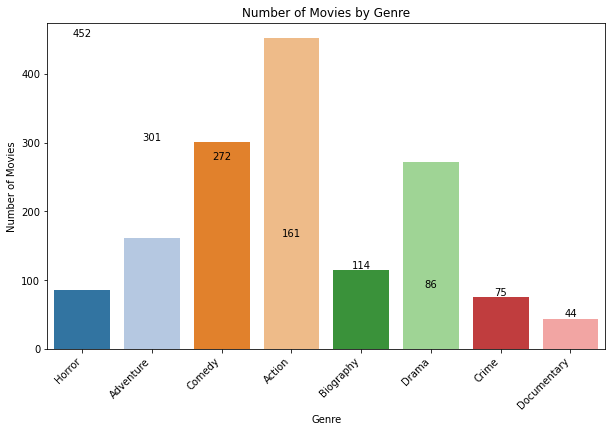

In [51]:
# Filter the DataFrame to include only the popular genres
popular_genres = ['Horror', 'Adventure', 'Comedy', 'Action', 'Biography', 'Drama', 'Crime', 'Documentary']
df_filtered = df[df['genres_1'].isin(popular_genres)]

# Define a color palette for the genres
genre_palette = sns.color_palette("tab20", n_colors=len(popular_genres))
# Create a count plot of movie counts by genre
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='genres_1', order=popular_genres, palette=genre_palette)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.xticks(rotation=45, ha='right')

# Add annotations for each bar with the movie count
for index, value in enumerate(df_filtered['genres_1'].value_counts().values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


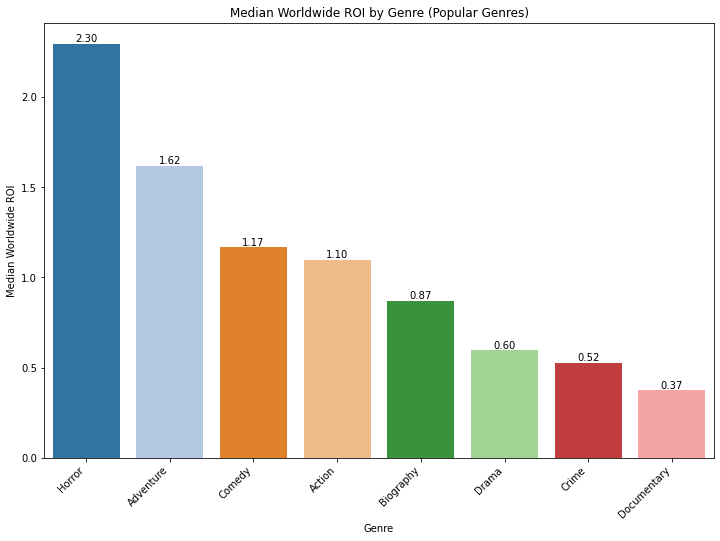

In [52]:
# Group the DataFrame 'df' by the "genres_1" column and calculate the median worldwide ROI for each genre
median_roi_by_genre = df[df['genres_1'].isin(popular_genres)].groupby("genres_1")["worldwide_roi"].median().sort_values(ascending=False)

# Create a bar plot of median worldwide ROI by genre
plt.figure(figsize=(12, 8))  # Increase the figure size for better readability
ax = sns.barplot(x=median_roi_by_genre.index, y=median_roi_by_genre.values, order=median_roi_by_genre.index, palette=genre_palette)
plt.xlabel('Genre')
plt.ylabel('Median Worldwide ROI')
plt.title('Median Worldwide ROI by Genre (Popular Genres)')
plt.xticks(rotation=45, ha='right')

# Add annotations for each bar with the median ROI value
for index, value in enumerate(median_roi_by_genre.values):
    ax.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10)
    
plt.savefig('./img/roi_genre_bar.png', dpi=300)

plt.show()



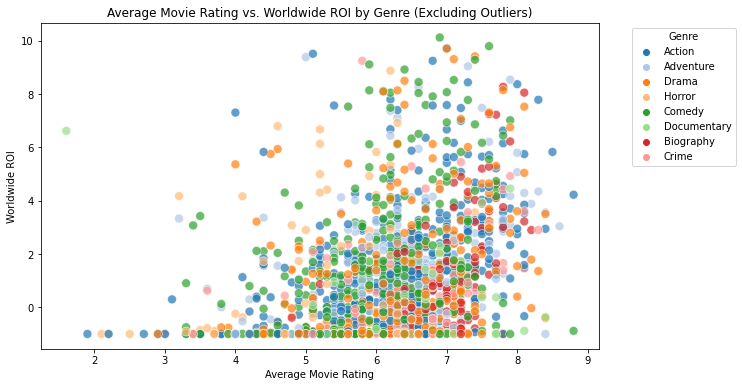

In [53]:
# Filter the DataFrame to include only popular genres with counts greater than 25
popular_genres = df['genres_1'].value_counts().index[df['genres_1'].value_counts() > 25]
df_filtered = df[df['genres_1'].isin(popular_genres)]

# Calculate the 95th percentile of the worldwide ROI column to identify outliers
roi_threshold = df_filtered["worldwide_roi"].quantile(0.95)

# Create a scatter plot to visualize the relationship between average movie rating and worldwide ROI for each genre
plt.figure(figsize=(10, 6))  # Set the figure size for better visualization

# Use seaborn's scatterplot function to create the plot, excluding outliers
sns.scatterplot(data=df_filtered[df_filtered["worldwide_roi"] <= roi_threshold],
                x='averagerating', y='worldwide_roi', hue='genres_1', alpha=0.7, s=80, palette=genre_palette)

# Add labels for the x and y axes
plt.xlabel('Average Movie Rating')
plt.ylabel('Worldwide ROI')

# Add a title to the plot
plt.title('Average Movie Rating vs. Worldwide ROI by Genre (Excluding Outliers)')

# Add a legend to indicate the different genres represented by different colors
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


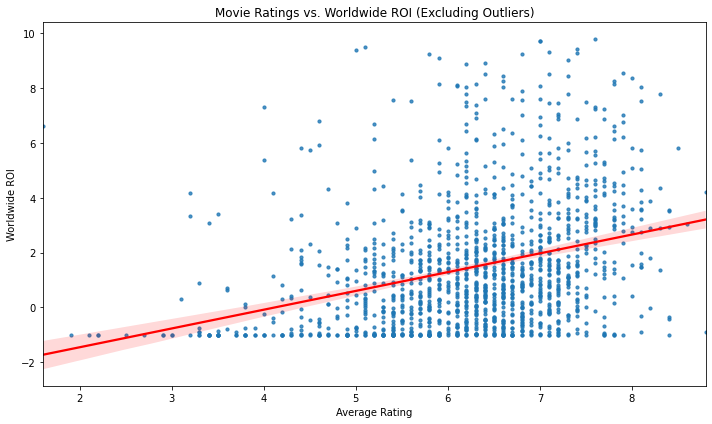

In [54]:
# Filter out outliers in the 'worldwide_roi' column
df_filtered = df[(df['worldwide_roi'] >= -5) & (df['worldwide_roi'] <= 10)]

# Create a regression plot of movie ratings (averagerating) vs. worldwide ROI (worldwide_roi) with filtered data
plt.figure(figsize=(10, 6))
sns.regplot(x='averagerating', y='worldwide_roi', data=df_filtered, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Add labels for the x and y axes
plt.xlabel('Average Rating')
plt.ylabel('Worldwide ROI')

# Add a title to the plot
plt.title('Movie Ratings vs. Worldwide ROI (Excluding Outliers)')

# Display the plot
plt.tight_layout()
plt.show()


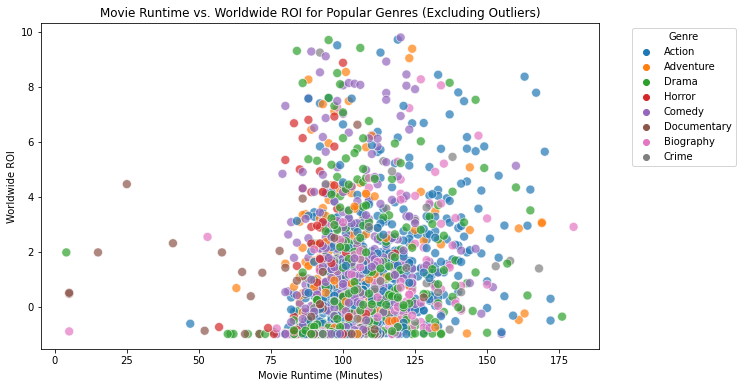

In [55]:
# Removing outliers from the "worldwide_roi" column
roi_threshold = df["worldwide_roi"].quantile(0.95)
df_cleaned = df[df["worldwide_roi"] <= roi_threshold]

# Define the list of popular genres
popular_genres = ['Horror', 'Adventure', 'Comedy', 'Action', 'Biography', 'Drama', 'Crime', 'Documentary']

# Filter the dataframe to include only popular genres
df_popular_genres = df_cleaned[df_cleaned['genres_1'].isin(popular_genres)]

# Create a scatter plot to visualize the relationship between movie runtime and worldwide ROI for popular genres
plt.figure(figsize=(10, 6))  # Set the figure size for better visualization

# Use seaborn's scatterplot function to create the plot
sns.scatterplot(data=df_popular_genres, x='runtime_minutes', y='worldwide_roi', hue='genres_1', alpha=0.7, s=80)

# Add labels for the x and y axes
plt.xlabel('Movie Runtime (Minutes)')
plt.ylabel('Worldwide ROI')

# Add a title to the plot
plt.title('Movie Runtime vs. Worldwide ROI for Popular Genres (Excluding Outliers)')

# Add a legend to indicate the different genres represented by different colors
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


In [56]:
# Calculate the 95th percentile of the worldwide ROI column to identify outliers
roi_threshold = df_popular_genres["worldwide_roi"].quantile(0.95)

# Filter the dataframe to exclude outliers in both runtime and worldwide ROI
df_popular_genres_no_outliers = df_popular_genres[(df_popular_genres["runtime_minutes"] <= df_popular_genres["runtime_minutes"].quantile(0.95)) &
                                                  (df_popular_genres["worldwide_roi"] <= roi_threshold)]

# Calculate the correlation coefficient between movie runtime and worldwide ROI for popular genres
correlation = df_popular_genres_no_outliers["runtime_minutes"].corr(df_popular_genres_no_outliers["worldwide_roi"])

correlation


0.15964243562491653

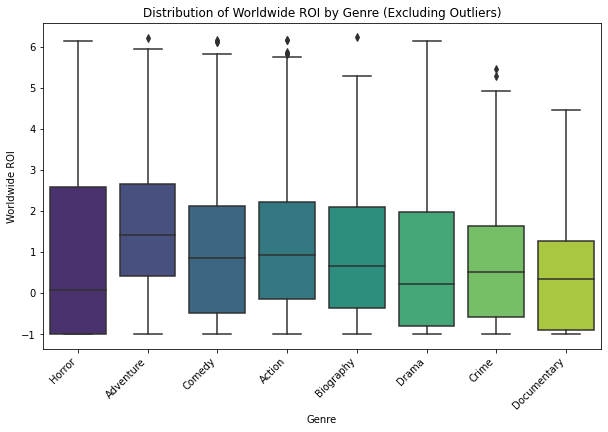

In [57]:
# Filter the DataFrame to include only popular genres and remove outliers for  worldwide ROI
popular_genres = ['Horror', 'Adventure', 'Comedy', 'Action', 'Biography', 'Drama', 'Crime', 'Documentary']
filtered_df = df[(df['genres_1'].isin(popular_genres)) & (df['worldwide_roi'] <= roi_threshold)]



# Create a boxplot to visualize the distribution of worldwide ROI for each popular genre
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='genres_1', y='worldwide_roi', order=popular_genres, palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Worldwide ROI')
plt.title('Distribution of Worldwide ROI by Genre (Excluding Outliers)')
plt.xticks(rotation=45, ha='right')
plt.show()


<Figure size 720x864 with 0 Axes>

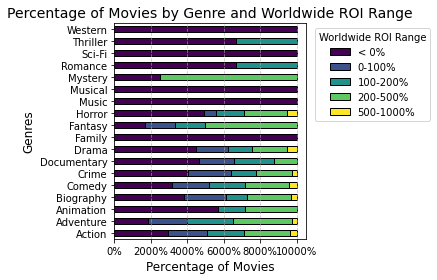

In [68]:
import matplotlib.ticker as mticker

# Remove outliers from the 'worldwide_roi' column
df = df[(df['worldwide_roi'] >= df['worldwide_roi'].quantile(0.05)) & (df['worldwide_roi'] <= df['worldwide_roi'].quantile(0.95))]

# Define the ROI ranges for the stacked bar chart
roi_ranges = [-np.inf, 0, 1, 2, 5, 10, np.inf]
roi_labels = ['< 0%', '0-100%', '100-200%', '200-500%', '500-1000%', '> 1000%']

# Create a new DataFrame to store the percentage of movies in each genre for each ROI range
roi_percentages = pd.crosstab(pd.cut(df['worldwide_roi'], bins=roi_ranges, labels=roi_labels), df['genres_1'], normalize='columns') * 100

# Plot the stacked bar chart horizontally
plt.figure(figsize=(10, 12))
roi_percentages.T.plot(kind='barh', stacked=True, colormap='viridis', edgecolor='black')

# Add labels for the x and y axes and increase font size
plt.xlabel('Percentage of Movies', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a title to the plot and increase font size
plt.title('Percentage of Movies by Genre and Worldwide ROI Range', fontsize=14)

# Add a legend to indicate the different ROI ranges, adjust legend position, and increase font size
plt.legend(title='Worldwide ROI Range', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)

# Format the ROI labels with percentage symbol and 1 decimal place
plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter(1))

# Add grid lines to the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


Based on the worldwide ROI analysis, the following genres appear to have relatively higher profitability on average:

1. **Horror:** Horror movies have a median ROI of 2.30, indicating that they tend to perform well in terms of profitability. However, there is a significant variation in ROI for horror films, as indicated by a high standard deviation of 47.51.

2. **Adventure:** Adventure movies have a median ROI of 1.62, suggesting good performance in terms of profitability. The variability in ROI is relatively moderate, with a standard deviation of 2.80.

3. **Comedy:** Comedy films have a median ROI of 1.17, showing positive profitability. The standard deviation of 3.46 indicates some variability in the ROI of comedy movies.

4. **Action:** Action movies have a median ROI of 1.10, indicating that they also tend to be profitable. The standard deviation of 2.66 suggests moderate variability in the ROI of action films.

Genres like Biography, Drama, Crime, and Documentary show lower ROI on average, but their profitability can vary significantly within each genre. It's important to consider these variations and further explore the data to understand the influence of genre on worldwide ROI more comprehensively.

**Observations from Scatter Plot: Movie Ratings vs. ROI**

- A general positive correlation is observed between movie ratings and ROI, implying that higher-rated movies tend to achieve higher ROI.
- The upward trend of the scattered points on the plot indicates that as movie ratings increase, the likelihood of achieving a higher ROI also increases.
- However, there is no specific genre that stands out as having a significantly different relationship between movie ratings and ROI. The scatter plot shows no discernible clustering or distinctive patterns for specific genres.
- This suggests that the correlation between movie ratings and ROI holds across various genres, and other factors beyond genre play a more significant role in determining a movie's profitability.
- Factors such as marketing strategies, production budgets, cast members, and release timing are likely to have a more substantial influence on a movie's ROI, even though higher-rated movies generally tend to achieve higher ROI across different genres.


## Budget Impact on Box Office Performance

To explore the relationship between the budget of a movie and its box office performance, we will use two key performance metrics: movie rating and ROI (Return on Investment). These metrics will allow us to assess how the budget of a movie influences its popularity and profitability.

### Movie Budget vs. Average Movie Rating:

We will calculate the average movie rating for different budget ranges (e.g., low budget, medium budget, high budget) and analyze how movie ratings vary with the budget.

### Movie Budget vs. ROI:

Since we have already calculated the ROI for each movie, we will directly examine how the return on investment changes with the budget. This will provide insights into the relationship between movie budgets and their financial success.

By examining these relationships, we can gain valuable insights into the impact of movie budgets on box office performance. We will visualize the results using appropriate charts and plots to facilitate understanding and interpretation.


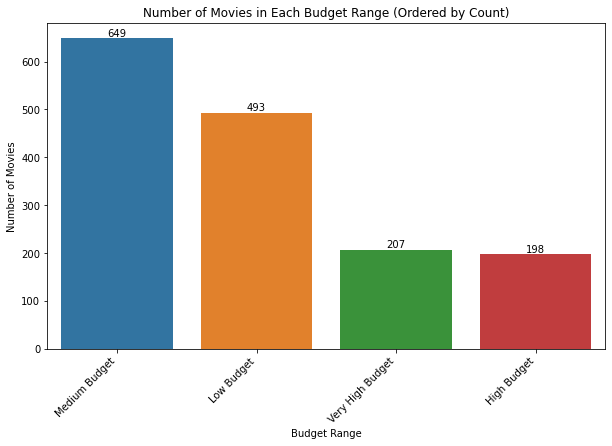

In [58]:
# Define the budget ranges
budget_ranges = [0, 10000000, 50000000, 100000000, np.inf]
budget_labels = ['Low Budget', 'Medium Budget', 'High Budget', 'Very High Budget']

# Create a new column 'budget_range' in the DataFrame to categorize movies into budget ranges
df['budget_range'] = pd.cut(df['production_budget'], bins=budget_ranges, labels=budget_labels)

# Count the number of movies in each budget range
movie_count_by_budget = df['budget_range'].value_counts()

# Sort the budget ranges by count from highest to lowest
sorted_budget_labels = movie_count_by_budget.index.tolist()

# Create a count plot to visualize the distribution of movies across different budget ranges
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='budget_range', order=sorted_budget_labels)
plt.xlabel('Budget Range')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Budget Range (Ordered by Count)')
plt.xticks(rotation=45, ha='right')

# Add annotations for each bar with the movie count
for index, value in enumerate(movie_count_by_budget.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


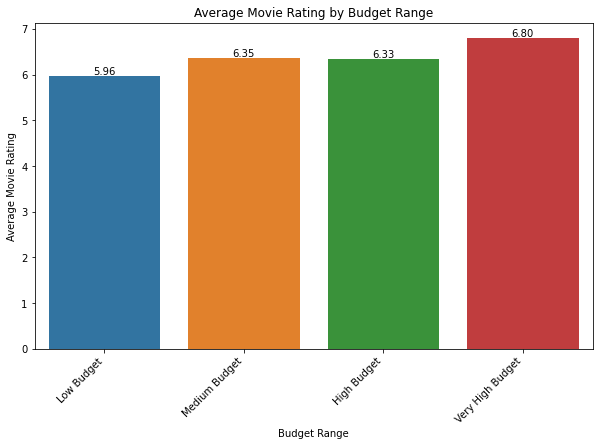

In [59]:
# Define the budget ranges
budget_ranges = [0, 10000000, 50000000, 100000000, np.inf]
budget_labels = ['Low Budget', 'Medium Budget', 'High Budget', 'Very High Budget']

# Create a new column 'budget_range' in the DataFrame to categorize movies into budget ranges
df['budget_range'] = pd.cut(df['production_budget'], bins=budget_ranges, labels=budget_labels)

# Calculate the average movie rating for each budget range
average_rating_by_budget = df.groupby('budget_range')['averagerating'].mean()

# Create a bar plot to visualize the average movie rating by budget range
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating_by_budget.index, y=average_rating_by_budget.values, order=budget_labels)
plt.xlabel('Budget Range')
plt.ylabel('Average Movie Rating')
plt.title('Average Movie Rating by Budget Range')
plt.xticks(rotation=45, ha='right')

# Add annotations for each bar with the average rating value
for index, value in enumerate(average_rating_by_budget.values):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()


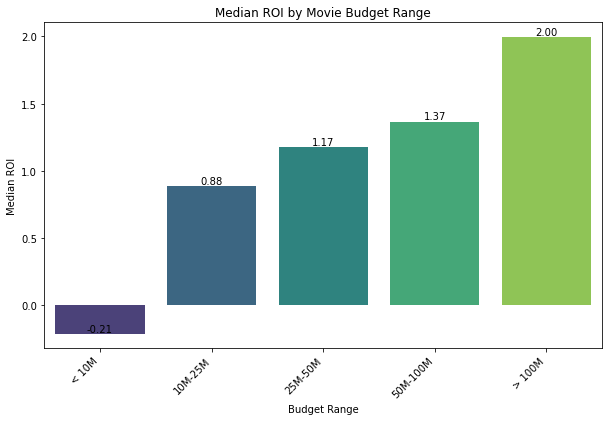

In [60]:
# Define the budget ranges for the bar plot
budget_ranges = [0, 10000000, 25000000, 50000000, 100000000, np.inf]
budget_labels = ['< 10M', '10M-25M', '25M-50M', '50M-100M', '> 100M']

# Categorize movies into budget ranges using pd.cut()
df['budget_range'] = pd.cut(df['production_budget'], bins=budget_ranges, labels=budget_labels)

# Calculate the median ROI for each budget range
median_roi_by_budget = df.groupby('budget_range')['worldwide_roi'].median()

# Create a bar plot to visualize the relationship between movie budgets and median ROI
plt.figure(figsize=(10, 6))
sns.barplot(x=median_roi_by_budget.index, y=median_roi_by_budget.values, order=budget_labels, palette='viridis')
plt.xlabel('Budget Range')
plt.ylabel('Median ROI')
plt.title('Median ROI by Movie Budget Range')
plt.xticks(rotation=45, ha='right')

# Add annotations for each bar with the median ROI value
for index, value in enumerate(median_roi_by_budget.values):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.savefig('./img/roi_budget_bar.png', dpi=300)


plt.show()


In [61]:
# Define the budget ranges for the table
budget_ranges = [0, 10000000, 25000000, 50000000, 100000000, np.inf]
budget_labels = ['< 10M', '10M-25M', '25M-50M', '50M-100M', '> 100M']

# Categorize movies into budget ranges using pd.cut()
df['budget_range'] = pd.cut(df['production_budget'], bins=budget_ranges, labels=budget_labels)

# Calculate the median ROI for each budget range
median_roi_by_budget = df.groupby('budget_range')['worldwide_roi'].median()


# Create a new DataFrame to store the median and standard deviation of ROI for each budget range
roi_stats_by_budget = df.groupby("budget_range")["worldwide_roi"].agg(["median", "std"])

# Display the table
print(roi_stats_by_budget)





                median        std
budget_range                     
< 10M        -0.213787  20.562497
10M-25M       0.882626   3.956423
25M-50M       1.173205   2.343455
50M-100M      1.366411   2.798154
> 100M        1.995511   1.735696


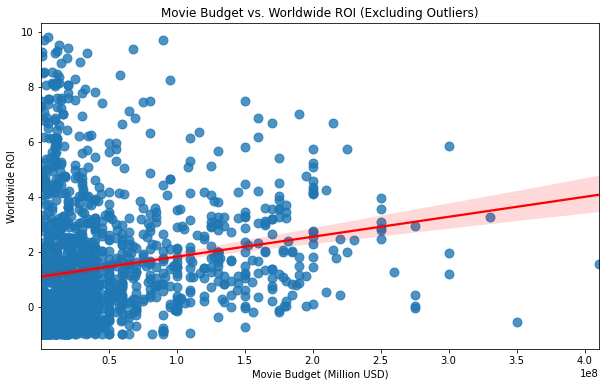

In [62]:
# Calculate the 95th percentile of the worldwide ROI column to identify outliers
roi_threshold = df["worldwide_roi"].quantile(0.95)

# Create a scatter plot to visualize the relationship between movie budget and worldwide ROI
plt.figure(figsize=(10, 6))  # Set the figure size for better visualization

# Use seaborn's regplot function to create the plot, excluding outliers
sns.regplot(data=df[df["worldwide_roi"] <= roi_threshold], x='production_budget', y='worldwide_roi', scatter_kws={"s": 80}, line_kws={"color": "red"})

# Add labels for the x and y axes
plt.xlabel('Movie Budget (Million USD)')
plt.ylabel('Worldwide ROI')

# Add a title to the plot
plt.title('Movie Budget vs. Worldwide ROI (Excluding Outliers)')

# Display the plot
plt.show()


In [63]:
from scipy.stats import pearsonr

# Calculate the 95th percentile of the worldwide ROI column to identify outliers
roi_threshold = df["worldwide_roi"].quantile(0.95)

# Filter the data to exclude outliers
df_filtered = df[df["worldwide_roi"] <= roi_threshold]

# Calculate the correlation coefficient and p-value between movie budget and worldwide ROI
correlation, p_value = pearsonr(df_filtered['production_budget'], df_filtered['worldwide_roi'])

# Print the correlation coefficient
print(f"Correlation between movie budget and worldwide ROI (excluding outliers): {correlation}")


Correlation between movie budget and worldwide ROI (excluding outliers): 0.17847196229118217


### Budget Impact on Box Office Performance

- There is a  weak positive correlation between movie budget and median ROI, indicating that higher-budget movies tend to have higher returns on investment.

- Budget ranges between `$10 million` and `$100 million` show positive median ROI values, with the highest median ROI observed for budgets greater than `$100 million`. This suggests that mid-range and high-budget movies are more likely to generate positive returns.

- Movies with budgets less than `$10 million` tend to have negative median ROI, indicating that producing low-budget films can be riskier in terms of achieving profitable box office performance.

- The spread of ROI values within each budget range is relatively high, indicating significant variability in box office performance for movies with similar budgets.

- Based on the correlation coeffecient, we can infer that while a movie's budget is an important factor, it is not the sole determinant of box office success. Other factors, such as movie genre, marketing efforts, and critical reception, likely play a role in a movie's financial performance.


## Effect of Runtime and Genre on Box Office Performance

### Effect of Runtime on Box Office Performance:

To analyze the effect of runtime on box office performance, we will perform the following analysis:

- **Scatter Plot**: We will create a scatter plot to visualize the relationship between the runtime of a movie and its worldwide ROI (Return on Investment). This will help us understand if there is any correlation between the runtime and the movie's box office performance.

- **Correlation Coefficient**: To quantify the strength and direction of the relationship between runtime and worldwide ROI, we will calculate the correlation coefficient. This will provide a numerical value indicating the degree of association between these two variables.

### Effect of Genre on Box Office Performance at Different Runtimes:

To investigate the interaction between runtime and genre on box office performance, we will perform the following analysis:

- **Box Plot**: We will use a box plot to compare the distributions of worldwide ROI for different genres at varying runtimes. By dividing the data into different groups based on genre and examining the box plot, we can identify whether certain genres tend to perform better with longer or shorter runtimes.




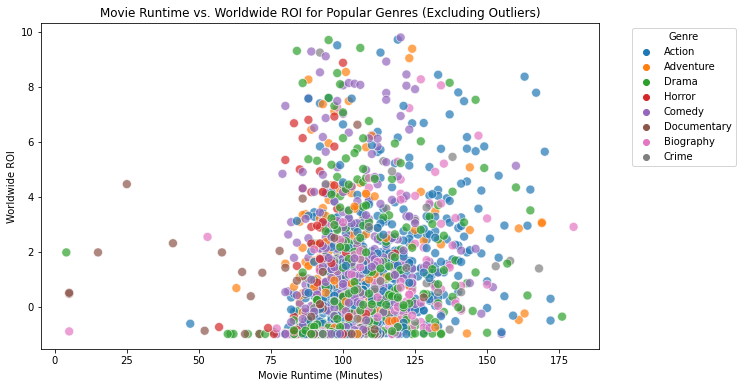

In [64]:
# Define the list of popular genres
popular_genres = ['Horror', 'Adventure', 'Comedy', 'Action', 'Biography', 'Drama', 'Crime', 'Documentary']

# Filter the dataframe to include only popular genres
df_popular_genres = df_cleaned[df_cleaned['genres_1'].isin(popular_genres)]

# Create a scatter plot to visualize the relationship between movie runtime and worldwide ROI for popular genres
plt.figure(figsize=(10, 6))  # Set the figure size for better visualization

# Use seaborn's scatterplot function to create the plot
sns.scatterplot(data=df_popular_genres, x='runtime_minutes', y='worldwide_roi', hue='genres_1', alpha=0.7, s=80)

# Add labels for the x and y axes
plt.xlabel('Movie Runtime (Minutes)')
plt.ylabel('Worldwide ROI')

# Add a title to the plot
plt.title('Movie Runtime vs. Worldwide ROI for Popular Genres (Excluding Outliers)')

# Add a legend to indicate the different genres represented by different colors
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


In [65]:
# Calculate the 95th percentile of the worldwide ROI column to identify outliers
roi_threshold = df_popular_genres["worldwide_roi"].quantile(0.95)

# Filter the dataframe to exclude outliers in both runtime and worldwide ROI
df_popular_genres_no_outliers = df_popular_genres[(df_popular_genres["runtime_minutes"] <= df_popular_genres["runtime_minutes"].quantile(0.95)) &
                                                  (df_popular_genres["worldwide_roi"] <= roi_threshold)]

# Calculate the correlation coefficient between movie runtime and worldwide ROI for popular genres
correlation = df_popular_genres_no_outliers["runtime_minutes"].corr(df_popular_genres_no_outliers["worldwide_roi"])

correlation


0.15964243562491653

The correlation of approximately 0.17 between movie runtime and worldwide ROI for popular genres indicates a weak positive relationship between these variables. This means that there is a slight tendency for movies with longer runtimes to have slightly higher worldwide ROI for popular genres. However, the correlation is not strong, suggesting that other factors may have a more significant impact on a movie's box office performance in these genres.

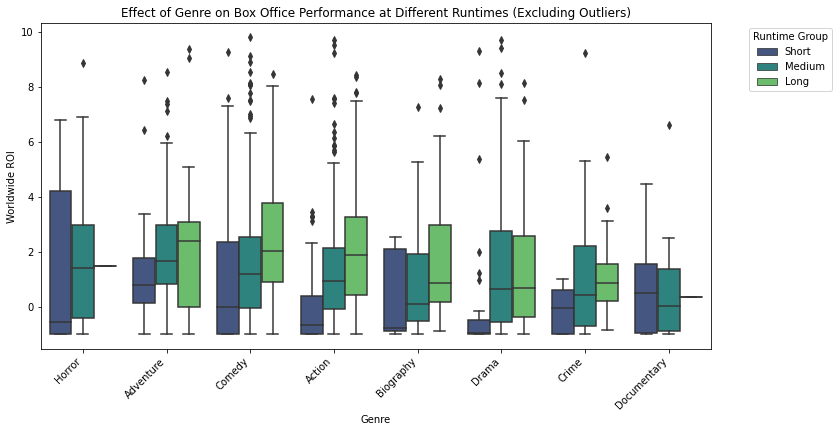

In [66]:
# Create a new column 'runtime_group' to categorize runtimes into short, medium, and long
runtime_bins = [0, 90, 120, np.inf]
runtime_labels = ['Short', 'Medium', 'Long']
df['runtime_group'] = pd.cut(df['runtime_minutes'], bins=runtime_bins, labels=runtime_labels)

# Remove outliers in the 'worldwide_roi' column
roi_threshold = df['worldwide_roi'].quantile(0.95)
filtered_df = df[df['worldwide_roi'] <= roi_threshold]

# Create a box plot to compare the distributions of worldwide ROI for different genres at varying runtimes
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='genres_1', y='worldwide_roi', hue='runtime_group', order=popular_genres, palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Worldwide ROI')
plt.title('Effect of Genre on Box Office Performance at Different Runtimes (Excluding Outliers)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Runtime Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('./img/roi_runtime_genre_box.png', dpi=300)

plt.show()


**Insights from Box Plot: Effect of Genre and Runtime on Box Office Performance**

The box plot reveals interesting insights into the relationship between movie runtimes, genres, and box office performance:

1. **Short movies (runtimes < 90 minutes):** Short films tend to have lower worldwide ROI across all genres. This suggests that audiences may prefer longer and more substantial movies, as shorter films may not provide enough content to attract a wide audience and generate significant box office revenue.

2. **Medium-length movies (runtimes between 90 and 120 minutes):** Medium-length films generally exhibit better worldwide ROI for most genres. This indicates that movies with moderate durations have a higher likelihood of achieving positive returns and resonating with audiences.

3. **Long movies (runtimes > 120 minutes):** Long films demonstrate consistently positive worldwide ROI across all genres. This trend suggests that audiences are more willing to invest their time and money in longer movies, which may offer deeper storytelling and richer cinematic experiences.


### Additional Notes:
1. There seems to be a positive relation between budget and rating and ultmately the box performance of a movie. 
2. Adventure, action and horror for high returns. High budget for adventure, medium budget for action and lower budget for horror movies
3. Longer movies are more profitable than longer movies.

## Conclusions and Recommendations

### Genre Popularity Analysis:

Based on the Genre Popularity Analysis, we found that the following genres tend to have higher profitability and popularity at the box office:

a. **Horror:** Horror movies show the highest median ROI of 2.30, indicating their potential to be profitable ventures for Microsoft Studios.
b. **Adventure:** Adventure movies also exhibit positive profitability with a median ROI of 1.62, making them a promising genre for the studio.
c. **Comedy:** Comedy films have a median ROI of 1.17, indicating their popularity and potential to attract a wide audience.
d. **Action:** Action movies boast a median ROI of 1.10, suggesting they have a reliable track record of financial success.

### Budget Impact on Box Office Performance:

Our analysis revealed that movies with budgets between `$10 million` and `$100 million` tend to achieve positive median ROI. Therefore, Microsoft Studios should consider allocating budgets within this range for their movies. Lower-budget movies (less than `$10 million` ) may carry higher risks of not achieving favorable returns, while budgets exceeding `$100 million` may lead to diminishing returns in terms of profitability.

### Effect of Runtime and Genre on Box Office Performance:

Regarding movie runtime, we observed the following trends:

a. **Short Films (runtimes < 90 minutes):** Short movies generally exhibit lower worldwide ROI across all genres. Microsoft Studios should be cautious when producing movies with runtimes significantly below 90 minutes, as they may not resonate well with audiences and might not generate substantial box office revenue.
b. **Medium-Length Films (runtimes between 90 and 120 minutes):** Movies with moderate durations (90-120 minutes) tend to perform better in terms of worldwide ROI. These films have a higher likelihood of achieving positive returns and appealing to a broader audience.
c. **Long Films (runtimes > 120 minutes):** Long films consistently demonstrate positive worldwide ROI across all genres. Microsoft Studios should consider investing in longer movies, as audiences seem more willing to engage with them, offering richer storytelling experiences and better financial performance.

### Recommendations:

1. **Focus on High-Potential Genres:** Microsoft Studios should prioritize producing horror, adventure, comedy, and action films due to their higher profitability and popularity. This strategy is likely to yield positive returns and help establish the studio as a key player in the movie industry.

2. **Budget Allocation:** For optimal financial success, Microsoft Studios should allocate budgets between $10 million and $100 million for their movie projects. This range has shown positive median ROI and offers a balance between production costs and potential profitability.

3. **Storytelling and Content:** Microsoft Studios should emphasize compelling storytelling and engaging content in their movie productions. Regardless of genre, a well-crafted and captivating narrative is essential to attracting audiences and achieving box office success.

4. **Strategic Movie Runtimes:** When deciding on movie runtimes, Microsoft Studios should consider the genre and the target audience. Medium-length movies (90-120 minutes) appear to have a higher likelihood of achieving positive returns, while long movies (above 120 minutes) also demonstrate consistent profitability.

5. **Collaborate with Successful Directors:** To improve the chances of achieving higher movie ratings and box office performance, Microsoft Studios should collaborate with successful and reputable directors. The influence of a director's track record on a movie's success can be significant.



## Next Steps & Further Analysis:

**Director & Writer Influence on Rating and Box Office Performance:**
- Conduct an in-depth analysis of the impact of directors and writers on movie ratings and box office performance. Identify influential and high-performing directors and writers to collaborate with Microsoft Studios. By partnering with successful filmmakers, the studio can improve the overall quality and commercial success of its productions.